## 텍스트 데이터 다루기
- 수치형 데이터와 달리, 텍스트 데이터의 길이는 일정하지 않다
- 전처리가 많이 필요하다

### 영화 리뷰 감성 분석
- 스탠포드 대학의 앤드류 마스가 IMDb(Internet Movie Database)에서 수집한 영화 리뷰 텍스트를 분석
- 25,000개의 훈련 데이터와 25,000개의 테스트 데이터를 제공
- 다음 사이트에서 데이터를 다운로든 받는다 (파일명 aclIMDb_v1.tar.gz, 80Mb)
http://ai.stanford.edu/~amaas/data/sentiment/
- 압축을 푼다 (tar -zcvf 파일명)
- aclIMDb 디렉토리에 여러가지 파일이 생긴다
- 레이블: 양성/음성 (1~10점에서, 7점 이상은 양성, 4점 이하는 음성으로 표현함, 중간 데이터는 포함하지 않음)

### 리눅스 압축파일 풀기 명령어
- tar 압축

tar -cvf [압축파일명.tar] [압축대상디렉토리 or 파일]

* tar 압축 해제

tar -xvf [압축파일명.tar]

* tar.gz 압축

tar -zcvf [압축파일명.tar.gz] [압축대상디렉토리 or 파일]

* tar.gz 압축 해제

tar -zxvf [압축파일명.tar.gz]

* zip 압축

zip [압축파일명.zip] [압축대상디렉토리 or 파일]

* zip 하위디렉토리 포함 압축 : -r 옵션

zip -r [압축파일명.zip] [압축대상디렉토리 or 파일]

* zip 압축 해제

unzip [압축파일명.zip]


출처: http://nicolasjo.tistory.com/77

In [1]:
# 하위 폴더의 목록을 find로 볼 수 있다. 
!find ./data/aclImdb/ -type d

find: ‘./data/aclImdb/’: No such file or directory


In [0]:
!python -V

Python 2.7.12


In [0]:
#tree 명령을 지원하는 경우
!tree -dL 2 data/aclImdb/

data/aclImdb/ [error opening dir]

0 directories


- pos 디렉토리에는 긍정적인 리뷰가 하나의 파일에 들어있고, neg에는 부정적인 리뷰가 하나의 파일로 들어 있다

In [0]:
!pip install mglearn

/usr/local/lib/python2.7/dist-packages/pip/_vendor/requests/__init__.py:83: RequestsDependencyWarning: Old version of cryptography ([1, 2, 3]) may cause slowdown.
  warnings.warn(warning, RequestsDependencyWarning)
  Using cached https://files.pythonhosted.org/packages/9e/29/bbf3414ba3d03cf1f8d8516e56d69e44ec0ad3fc79a3713b1c6809070e7d/scikit_learn-0.20.2-cp27-cp27mu-manylinux1_x86_64.whl
Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/usr/local/lib/python2.7/dist-packages/sklearn'
Consider using the `--user` option or check the permissions.

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [0]:
%matplotlib inline
from preamble import *

In [0]:
#unsup에는 레이블이 없는 데이터가 들어 있다. 사용하지 않으므로 지운다
!rm -r ./data/aclImdb/train/unsup

rm: cannot remove './data/aclImdb/train/unsup': No such file or directory


- 훈련 데이터를 load_files를 이용하여 읽는다
- 디렉토리 내의 파이들이 레이블별로 구분되어 있으면 이를 자동으로 target 변수로 만들어 준다
- net는 레이블 0으로, pos는 레이블 1로 자동으로 분류한다 (알파벳 순)
- 데이터는 data로 레이블은 target으로 만든다

In [0]:
from sklearn.datasets import load_files

reviews_train = load_files("data/aclImdb/train", shuffle=True)
# 텍스트와 레이블을 포함하고 있는 Bunch 오브젝트를 반환

text_train, y_train = reviews_train.data, reviews_train.target
print("text_train의 타입: {}".format(type(text_train)))
print("text_train의 길이: {}".format(len(text_train)))
print("text_train:\n{}".format(text_train[0:2]))
print("y_train:\n{}".format(y_train[0:20]))

FileNotFoundError: [Errno 2] No such file or directory: 'data/aclImdb/train'

In [0]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [0]:
print("text_train[0]:\n{}".format(text_train[0:2]))

text_train[0]:
[b"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.  It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see.   Flawed but honest with a terrible honesty.", b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3

In [0]:
print("클래스별 샘플 수 (훈련 데이터): {}".format(np.bincount(y_train)))

클래스별 샘플 수 (훈련 데이터): [12500 12500]


In [0]:
y_train[:20]

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1])

In [0]:
reviews_test = load_files("data/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print("테스트 데이터의 문서 수: {}".format(len(text_test)))
print("클래스별 샘플 수 (테스트 데이터): {}".format(np.bincount(y_test)))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

테스트 데이터의 문서 수: 25000
클래스별 샘플 수 (테스트 데이터): [12500 12500]


In [0]:
y_test[:20]

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1])

### 텍스트 데이터를 BOW로 표현하기
- 문장의 구조 정보는 잃고, 문서내에 단어의 발생 빈도만 분석에 사용하는 방법
- 토큰화: 공백이나 구두점을 경계로 단어는 나누는 것
- 어휘사전 구축: 모든 문서에 나타난 모든 단어의 사전을 만든다 (0번 부터 단어에 번호를 배정)
- 인코딩: 사전의 각 단어가 몇 번 나타났는지를 측정

#### 샘플 데이터에 BOW 적용하기
- CountVectorizer를 사용
- fit으로 훈련데이터를 토큰으로 나누고 어휘사전을 구축하여, vocabulary_ 에 속성을 저장
- BOW 형식으로 만들려면 transform()을 수행 (sparse 형식으로 저장함)

In [0]:
bards_words =["The fool doth think he is wise,",
              "but the wise man knows himself to be a fool"]

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [0]:
print("어휘 사전의 크기: {}".format(len(vect.vocabulary_)))
print("어휘 사전의 내용:\n\n {}".format(vect.vocabulary_))

어휘 사전의 크기: 13
어휘 사전의 내용:

 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [0]:
bag_of_words = vect.transform(bards_words)
print("BOW: {}".format(repr(bag_of_words)))

BOW: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [0]:
#희소행렬을 일반 배열로 바꾸어 보려면 toarray 메소드를 사용하여 Numpy배열로 바꿔야 한다 
#데이터의 크기가 클 때에는 Memory Error 발생을 주의 해야 한다.
print("BOW 표현:\n{}".format(bag_of_words.toarray()))

BOW 표현:
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


- 한글에 대해서도 동작

In [0]:
words =["오늘 날씨가 좋다",
       "내일 날씨가 좋을까"]

In [0]:
vect.fit(words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [0]:
print("어휘 사전의 크기: {}".format(len(vect.vocabulary_)))
print("어휘 사전의 내용:\n\n {}".format(vect.vocabulary_))

어휘 사전의 크기: 5
어휘 사전의 내용:

 {'오늘': 2, '날씨가': 0, '좋다': 3, '내일': 1, '좋을까': 4}


In [0]:
bag_of_words = vect.transform(words)
print("BOW: {}".format(repr(bag_of_words)))

BOW: <2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>


In [0]:
print("BOW 표현:\n{}".format(bag_of_words.toarray()))

BOW 표현:
[[1 0 1 1 0]
 [1 1 0 0 1]]


In [0]:
print("BOW 표현:\n{}".format(bag_of_words))

BOW 표현:
  (0, 0)	1
  (0, 2)	1
  (0, 3)	1
  (1, 0)	1
  (1, 1)	1
  (1, 4)	1


### 영화 리뷰에 대한 BOW (감성분석)

In [0]:
#앞의 IMDb리뷰의 훈련데이터와 테스트데이터
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))
# 훈련데이터의 BOW표현인 Xtrain의 크기는 25,000 * 74849로 이 어휘사전은 단어를 75천개 담고 있음
# 이 데이터는 SciPy희소행렬로 저장되어 있음. 

X_train:
<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [0]:
X_train

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>

In [0]:
# get_feature_names 메소드는 각 특성에 해당하는 단어를 리스트로 반환함. 
feature_names = vect.get_feature_names()
print("특성 개수: {}".format(len(feature_names)))
print("처음 20개 특성:\n{}".format(feature_names[:20]))
print("20010에서 20030까지 특성:\n{}".format(feature_names[20010:20030]))
print("매 2000번째 특성:\n{}".format(feature_names[::2000]))

특성 개수: 74849
처음 20개 특성:
['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
20010에서 20030까지 특성:
['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']
매 2000번째 특성:
['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("크로스 밸리데이션 평균 점수: {:.2f}".format(np.mean(scores)))

크로스 밸리데이션 평균 점수: 0.88


- 의미 없는 숫자들이 평가 문서에 많이 들어 있는 것을 알 수 있다.
- 아무런 데이터 전처리를 하지 않고, 로지스틱 회귀분석을 적용할 때의 성능을 살펴보겠다.
- 교차검증을 해보니, 이 모델의 성능은 0.88이었다

- 고차원 희소행렬 데이터의 경우 로지스틱 리그레션을 이용한 분류기의 성능이 가장 좋다
- LogisticRegression과 LinearsSVC에서 규제의 강도를 결정하는 매개변수는 C
- C의 값이 높아지면 규제가 감소. 높은값을 지정하면, 훈련세트에 가능한 최대로 맞추려 하고, 반면에 C값을 낮추면 모델은 계수 벡터(w)가 0에 가까워지도록 만들어짐. 
- Ridge와 마찬가지고 L2규제를 사용함. 왜? To avoid overfitting
- L1: 영향없는 특성을 없애는 효과, L2: Dominant한 특성의 영향을 줄이는 효과
- 그리드 검색을 사용하겠다.

In [0]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.1]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최상의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))
print("최적의 매개변수: ", grid.best_params_)

최상의 크로스 밸리데이션 점수: 0.89
최적의 매개변수:  {'C': 0.1}


- 최적의 C 값이 0.1이므로 이를 사용하여 테스트 데이터에 적용해본다

In [0]:
X_test = vect.transform(text_test)
print("테스트 점수: {:.2f}".format(grid.score(X_test, y_test)))

테스트 점수: 0.88


### 데이터 전처리
- 성능을 개선하기 위해서 의미 있는 데이터만 포함하도록 데이터를 전처리한다
- 의미 없는 데이터를 삭제해야 성능이 개선된다
- CountVectorizer는 모든 영문은 소문자로 바꾼다

- 전체 문서중에 적어도 2개의 문서 이상에서 등장한 단어만 고려한다. 적은 수의 문서에서만 등장한 단어는 일반성이 떨어지는 특수 단어이므로 테스트 문서에 나타날 가능성이 거의 없기 때문이다.
- 이를 위해 min_df 변수를 지정한다
- 아래에 5개 이상의 문서에 나타난 단어만 선택하여 특성의 갯수를 약 1/3인 27000여개로 줄였다
- 철자가 틀린 단어도 제외할 수 있다
- **어휘 사전에 없던 단어가 테스트 셋에 나타나면 이는 무시한다**

In [0]:
#|b|w|w + |b => 경계(b)가 구분되고 적어도 둘이상의 문자나 숫자(w)가 연속된 단어를 찾음
# 한글자로 된 단어는 찾지 않으며, 축약형은 분리되고, 모두 소문자로 바꿈
#의미없는 특성(숫자같은)을 줄이는 방법은? 적어도 두개의 문서(또는 다섯개문서)에 나타난
# 단어만 사용. min_df매개변수로 최소 문서 개수를 지정할수 있음. 

vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("min_df로 제한한 X_train: {}".format(repr(X_train)))

min_df로 제한한 X_train: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [0]:
feature_names = vect.get_feature_names()

print("First 50 features:\n{}".format(feature_names[:50]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 700th feature:\n{}".format(feature_names[::700]))

First 50 features:
['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']
Features 20010 to 20030:
['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']
Every 700th feature:
['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butchered', 'cheese', 'commitment', 'courts', 'deconstructed', 'disgraceful', 'dvds', 'eschews', 'fell', 'freezer', 'goriest', 'hauser', 'hungary', 'insinuate', 'juggle', 'leering', 'maelstrom', 'messiah', 'music', 'occasional', 'parking', 'pleasantville', 'pronunciati

In [0]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최적의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))
#모델성능은 별로 개선되지 않았지만 특성의 갯수가 줄어 처리속도가 빨라지고, 불필요한 특성이 없어져
#모델을 이해하기 쉬워짐

최적의 크로스 밸리데이션 점수: 0.89


### 불용어
- 의미없는 단어 제거: 너무 빈번하여 유용하지 않은 단어를 제외
- 두가지방법: 언어별 stopword목록을 사용 또는 너무 빈번한 단어 제거
- sklearn은 feature_extraction.text 모듈에 영어의 불용어를 포함

In [0]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("불용어 개수: {}".format(len(ENGLISH_STOP_WORDS)))
print("매 5번째 불용어:\n{}".format(list(ENGLISH_STOP_WORDS)[:50]))
#불용어를 제거하면 특성의 개수가 (318개)만큼 줄고 성능이 향상될수 있음

불용어 개수: 318
매 5번째 불용어:
['whole', 'yourself', 'forty', 'latter', 'your', 'name', 'made', 'sincere', 'several', 'whereafter', 'its', 'somewhere', 'since', 'towards', 'amongst', 'though', 'within', 'can', 'anyhow', 'hereby', 'ours', 'indeed', 'still', 'always', 'now', 'formerly', 'without', 'fill', 'nor', 'done', 'each', 'everyone', 'side', 'couldnt', 'amount', 'is', 'least', 'our', 'then', 'three', 'less', 'twelve', 'co', 'many', 'therefore', 'her', 'thin', 'through', 'latterly', 'of']


In [0]:
# stop_words="english"라고 지정하면 내장된 불용어를 사용합니다.
# 내장된 불용어에 추가할 수도 있고 자신만의 리스트를 사용할 수도 있습니다.
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("불용어가 제거된 X_train:\n{}".format(repr(X_train)))

불용어가 제거된 X_train:
<25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


In [0]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최상의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))

최상의 크로스 밸리데이션 점수: 0.88


- 너무 자주 많은 문서에 나타나는 단어를 제외하는 방법으로 max_df를 지정할 수 있다
- 예를 들어 총 25000개 문서중에 20000개 이상의 문서에 모두 나타나는 단어를 제외하려면 max_df=20000 을 지정하면 된다

In [0]:
#pipline을 사용하면 각 처리단계에서 필요한 매개변수 탐색을 동시에 수행할수 있음. 
# 전처리 + 분류 과정을 위해 작성해야 할 코드가 줄어듬
# cross_val_score나 GridSearchCV에 파이프라인을 적용하는 예

from sklearn.pipeline import make_pipeline
pipe = make_pipeline(CountVectorizer(), LogisticRegression())
param_grid = {'countvectorizer__max_df': [100, 1000], 
              'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("최상의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))
print(grid.best_params_)

최상의 크로스 밸리데이션 점수: 0.89
{'countvectorizer__max_df': 20000, 'logisticregression__C': 0.1}


In [0]:
len(grid.best_estimator_.named_steps['countvectorizer'].vocabulary_)

AttributeError: 'LogisticRegression' object has no attribute 'named_steps'

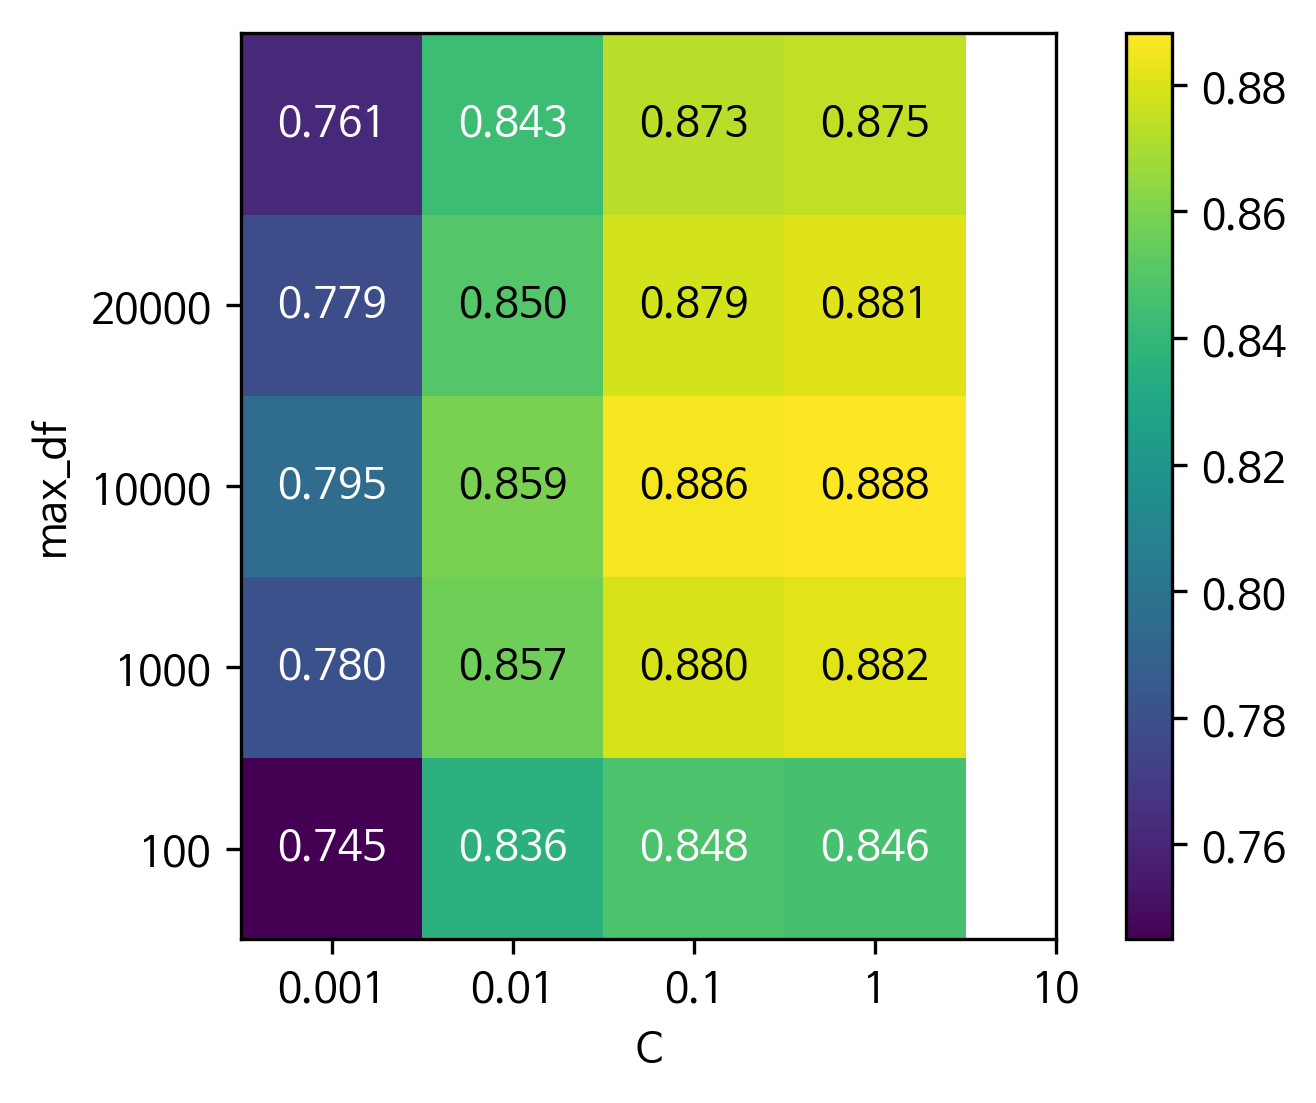

In [0]:
scores = grid.cv_results_['mean_test_score'].reshape(-1, 5).T
# 히트맵을 그립니다
heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="max_df", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['countvectorizer__max_df'])
plt.colorbar(heatmap)

- 중요하지 않아 보이는 특성을 제외하는 대신, 얼마나 의미 있는 특성인지를 계산해서 스케일을 조정하는 방식. 
- Term frequency inverse document frequency (단어빈도-역문서빈도)
- 말뭉치의 다른 문서보다 일부 문서에 자주 나타나는 단어에 높은 가중치를 주는 방법
- TfidVectorizer는 (CounterVectorizer의 서브클래스로) 텍스트 데이터를 입력받아 BOW를 만들고, TfidfTransformer를 사용하여 tf-idf 변환을 수행
- TfidfTransformer는 CounterVectorizer가 만든 희소 배열을 사용해 tf-idf변환을 함.
- tf-idf에는 여러 변종이 있다

### tf–idf로 데이터 스케일 변경


\begin{equation*}
\text{tfidf}(w, d) = \text{tf} \times (\log\big(\frac{N + 1}{N_w + 1}\big) + 1)
\end{equation*}

- N은 훈련세트에 있는 문서의 개수, Nw는 단어 w가 나타난 훈련세트문서의 개수이며, 
- tf(단어빈도수)는 단어 w가 대상문서 d(변환하려는 문서)에 나타난 횟수. 
- 값 1을 분자, 분모, 그리고 로그 내에 추가한 이유는 분모가 0이되거나 로그값이 0이 되는 것을 방지하기 위해서이다(어떤 단어가 모든 문서에 들어 있는 경우 $log1 = 0$)
- tf-idf계산을 한후에 L2정규화를 수행한다. 다시말해, 유크리디안 놈이 1이 되도록 각 문서 벡터의 스케일을 바꾼다. 
- 이렇게 하는 이유는 벡터 값이 문서의 크기(단어의 수)에 영향을 받지 않도록 하기 위해서임

- tf-idf는 실제로 훈련데이터의 통계적 속성을 사용하기 때문에 파이프라인을 사용한 그리드서치가 편리하다

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
param_grid = {'logisticregression__C': [0.1]}
# param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("최상의 교차검증 점수: {:.2f}".format(grid.best_score_))

NameError: name 'TfidfVectorizer' is not defined

- 최상의 점수가 0.89로서 개선된 것은 없다
- 이 예에서는 tf-idf가 성능에 큰 영향을 주지 못한다. 그러나 tf-idf는 어떤 단어가 가장 중요한지 알려준다

In [0]:
#파이프라인에서 TfidVectorizer단계를 선택 (소문자로 표현된다)
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# 훈련 데이터셋을 변환합니다
X_train = vectorizer.transform(text_train)
# 특성별로 가장 큰 값을 찾습니다
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# 특성 이름을 구합니다
feature_names = np.array(vectorizer.get_feature_names())

print("가장 낮은 tfidf를 가진 특성:\n{}".format(
      feature_names[sorted_by_tfidf[:20]]))

print("가장 높은 tfidf를 가진 특성: \n{}".format(
      feature_names[sorted_by_tfidf[-20:]]))

가장 낮은 tfidf를 가진 특성:
['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
가장 높은 tfidf를 가진 특성: 
['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


/home/ccnlml/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


- tf-idf가 낮은 특성은 전체 문서에 걸쳐 매우 많이 나타나거나, 조금씩만 사용되거나, 매우 긴문서에만 사용됨. 전체문서에 걸쳐 많이 나타나면 idf값이 1에 가깝게 되고, 조금씩 사용되거나 매우 긴문서에서만 사용되면 L2정규화 때문에 tf-idf값이 작아짐
- tf-idf가 높은 특성은 특정한 영화를 나타낸다(위에서 pokemon 등).
- idf 값이 낮은 단어는 모든 문서에 자주 나타나서 덜 중요하다고 판단된다. "the"난 "no"같은 영어의 불용어가 해당된다. "good", "grear" "bad"도 매우 자주 나타나는 단어이며 감성분석에는 매우 중요하겠지만 tf-idf로 봤을 때는 덜 중요한 단어가 된다
- 아래에서 movie 같은 단어는 영화 리뷰이므로 나타나는 것이다

In [0]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("가장 낮은 idf를 가진 특성:\n{}".format(
       feature_names[sorted_by_idf[:100]]))

가장 낮은 idf를 가진 특성:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


In [0]:
print("가장 높은 idf를 가진 특성:\n{}".format(
       feature_names[sorted_by_idf[-20:]]))

가장 높은 idf를 가진 특성:
['tenement' 'tenements' 'tenets' 'preclude' 'gravelly' 'grandest'
 'gravely' 'greendale' 'tenure' 'calligraphy' 'tepper' 'prc' 'greenstreet'
 'callaghan' 'caligula' 'pratfall' 'prankster' 'prakash' 'grayce' 'émigré']


### 모델 계수 조사
- 로지스틱 회귀모델이 실제로 이 데이터에서 무엇을 학습했는지 살펴보자
- 현재는 자주 나타나지 않은 단어를 제외해도 특성이 27,271개. 모두 확인할 수 없음
- 가장 큰 값의 계수와 해당 단어를 확인해 봄

In [0]:
grid.best_estimator_.named_steps["logisticregression"].coef_

In [0]:
grid.best_estimator_.named_steps["logisticregression"].coef_[0].shape

In [0]:
feature_names

array(['00', '000', '007', ..., 'zuniga', 'zwick', 'émigré'], dtype='<U20')

In [0]:
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_[0],
    feature_names, n_top_features=40)

### 여러 단어로 만든 BOW (n-Grams)

- BOW표현방식은 단어의 순서가 완전히 무시된다는 것이 큰 단점임. 
- it's bad, not good at all = it's good, not bad at all
- 단어 앞에 있는 "not"은 문맥의 중요성을 잘 보여주는 예
- BOW표현방식을 사용할때 문맥을 고려하는 방법이 있음. 
- 토큰 하나의 횟수만 고려하지 않고, 옆에 있는 두세개의 토큰을 함께 고려하는 방식
- 토큰 두개를 bigram, 세개를 trigram, 연속된 토큰을 n-gram
- CountVectorizer와 TfidVectorizer는 n-gram range를 매개변수 특성으로 지정
- 입력값은 튜플이며 연속된 토큰의 최소길이와 최대길이

In [0]:
print("bards_words:\n{}".format(bards_words))

bards_words:
['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


In [0]:
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
print("어휘 사전 크기: {}".format(len(cv.vocabulary_)))
print("어휘 사전:\n{}".format(cv.get_feature_names()))

어휘 사전 크기: 13
어휘 사전:
['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


In [0]:
#연속된 토큰의 수가 커지면 보통 특성이 더 구체적이고 많이 만들어짐
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
print("어휘 사전 크기: {}".format(len(cv.vocabulary_)))
print("어휘 사전:\n{}".format(cv.get_feature_names()))

어휘 사전 크기: 14
어휘 사전:
['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


In [0]:
#bar-words에 있는 두문장사이에는 공통된 바이그램이 없음. 
print("변환된 데이터 (밀집 배열):\n{}".format(cv.transform(bards_words).toarray()))

변환된 데이터 (밀집 배열):
[[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [0]:
#5그램까지는 도움이 되지만 특성의 개수가 매우 많아지며, 과대적합될 가능성이 있음. 
#바이그램의 수는 유니그램수의 제곱, 트라이그램의 수는 유니그램의 세제곱
# 유니그램, 바이그램, 트라이그램을 적용한 예
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
print("어휘 사전 크기: {}".format(len(cv.vocabulary_)))
print("어휘 사전:{}\n".format(cv.get_feature_names()))

어휘 사전 크기: 39
어휘 사전:['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']



In [0]:
#IMDb영화리뷰 데이터에 TfidfVectorizer를 적용하고, 
#그리드서치로 최적의 n-그램 범위를 찾아보자
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
# 매개변수 조합이 많고 트라이그램이 포함되어 있기 때문에 그리드 서치 실행에 시간이 오래 걸린다

param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100],
               "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}

# param_grid = {'logisticregression__C': [0.1],
#               "tfidfvectorizer__ngram_range": [(1, 2)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("최상의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))
print("최적의 매개변수:\n{}".format(
        grid.best_params_))
# 바이그램과 트라이그램을 추가해서 성능이 1%이상 올라감. 

/home/ccnlml/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/home/ccnlml/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
/home/ccnlml/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float)

최상의 크로스 밸리데이션 점수: 0.91
최적의 매개변수:
{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


In [0]:
#ngram_range와 C 매개변수에 대한 교차검증 정확도를 히트맵으로 나타내보자. 
# 그리드 서치에서 테스트 점수를 추출합니다
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
# 히트맵을 그립니다
heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

- 히트맵을 보니 바이그램이 성능을 크게 높여주며, 트라이그램은 정확도 측면에서 성능이 조금만 향상됨
- 모델이 어떻게 향상됐는지 더 잘 이해하기위해 유니그램, 바이그램, 트라이그램을 포함해 최적모델을 중요계수를 그래프로 나타냄.

(-22, 22)

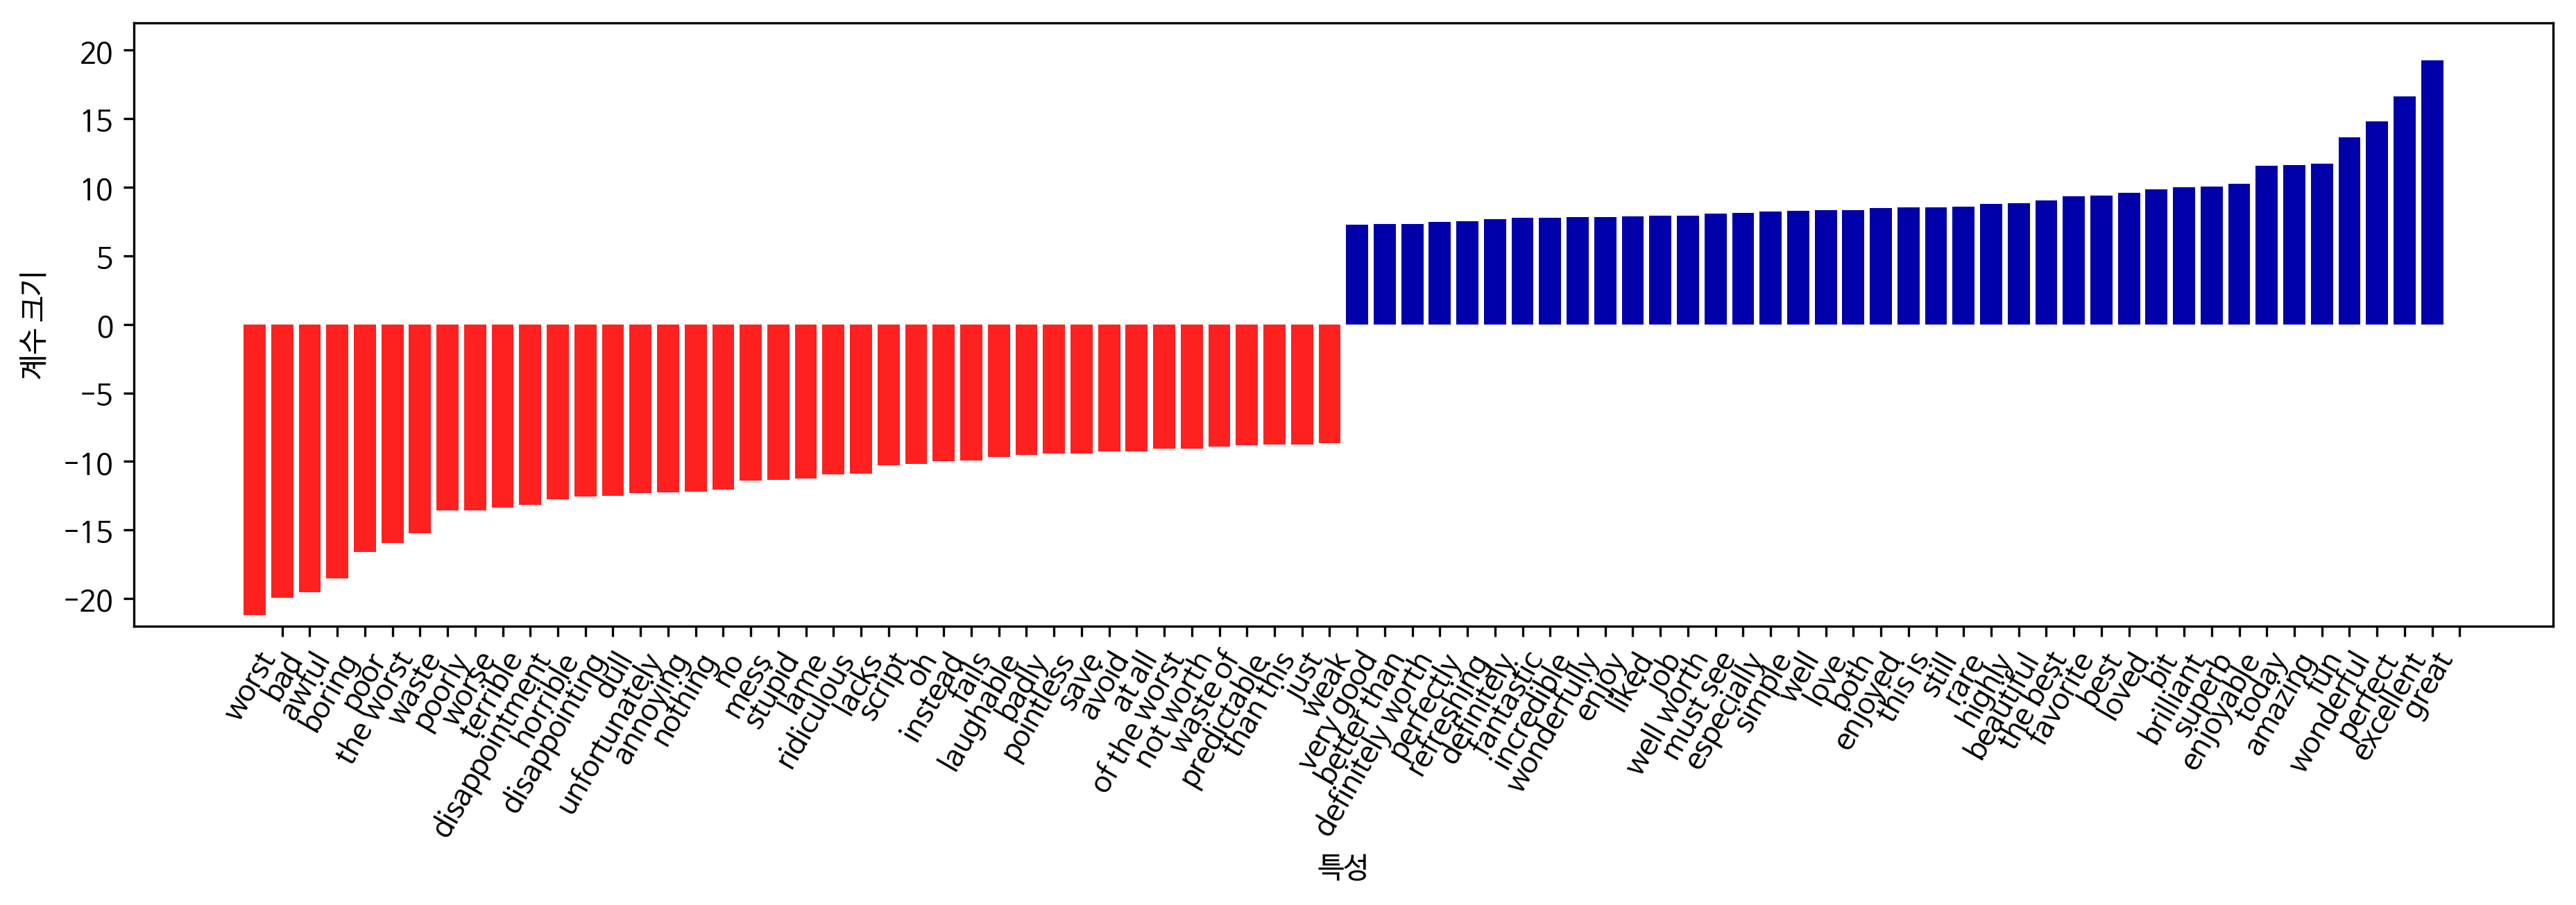

In [0]:
# 특성 이름과 계수를 추출합니다
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef[0], feature_names, n_top_features=40)
plt.ylim(-22, 22)

In [0]:
# 트라이그램 특성을 찾습니다
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
# 트라이그램 특성만 그래프로 나타냅니다

(-22, 22)

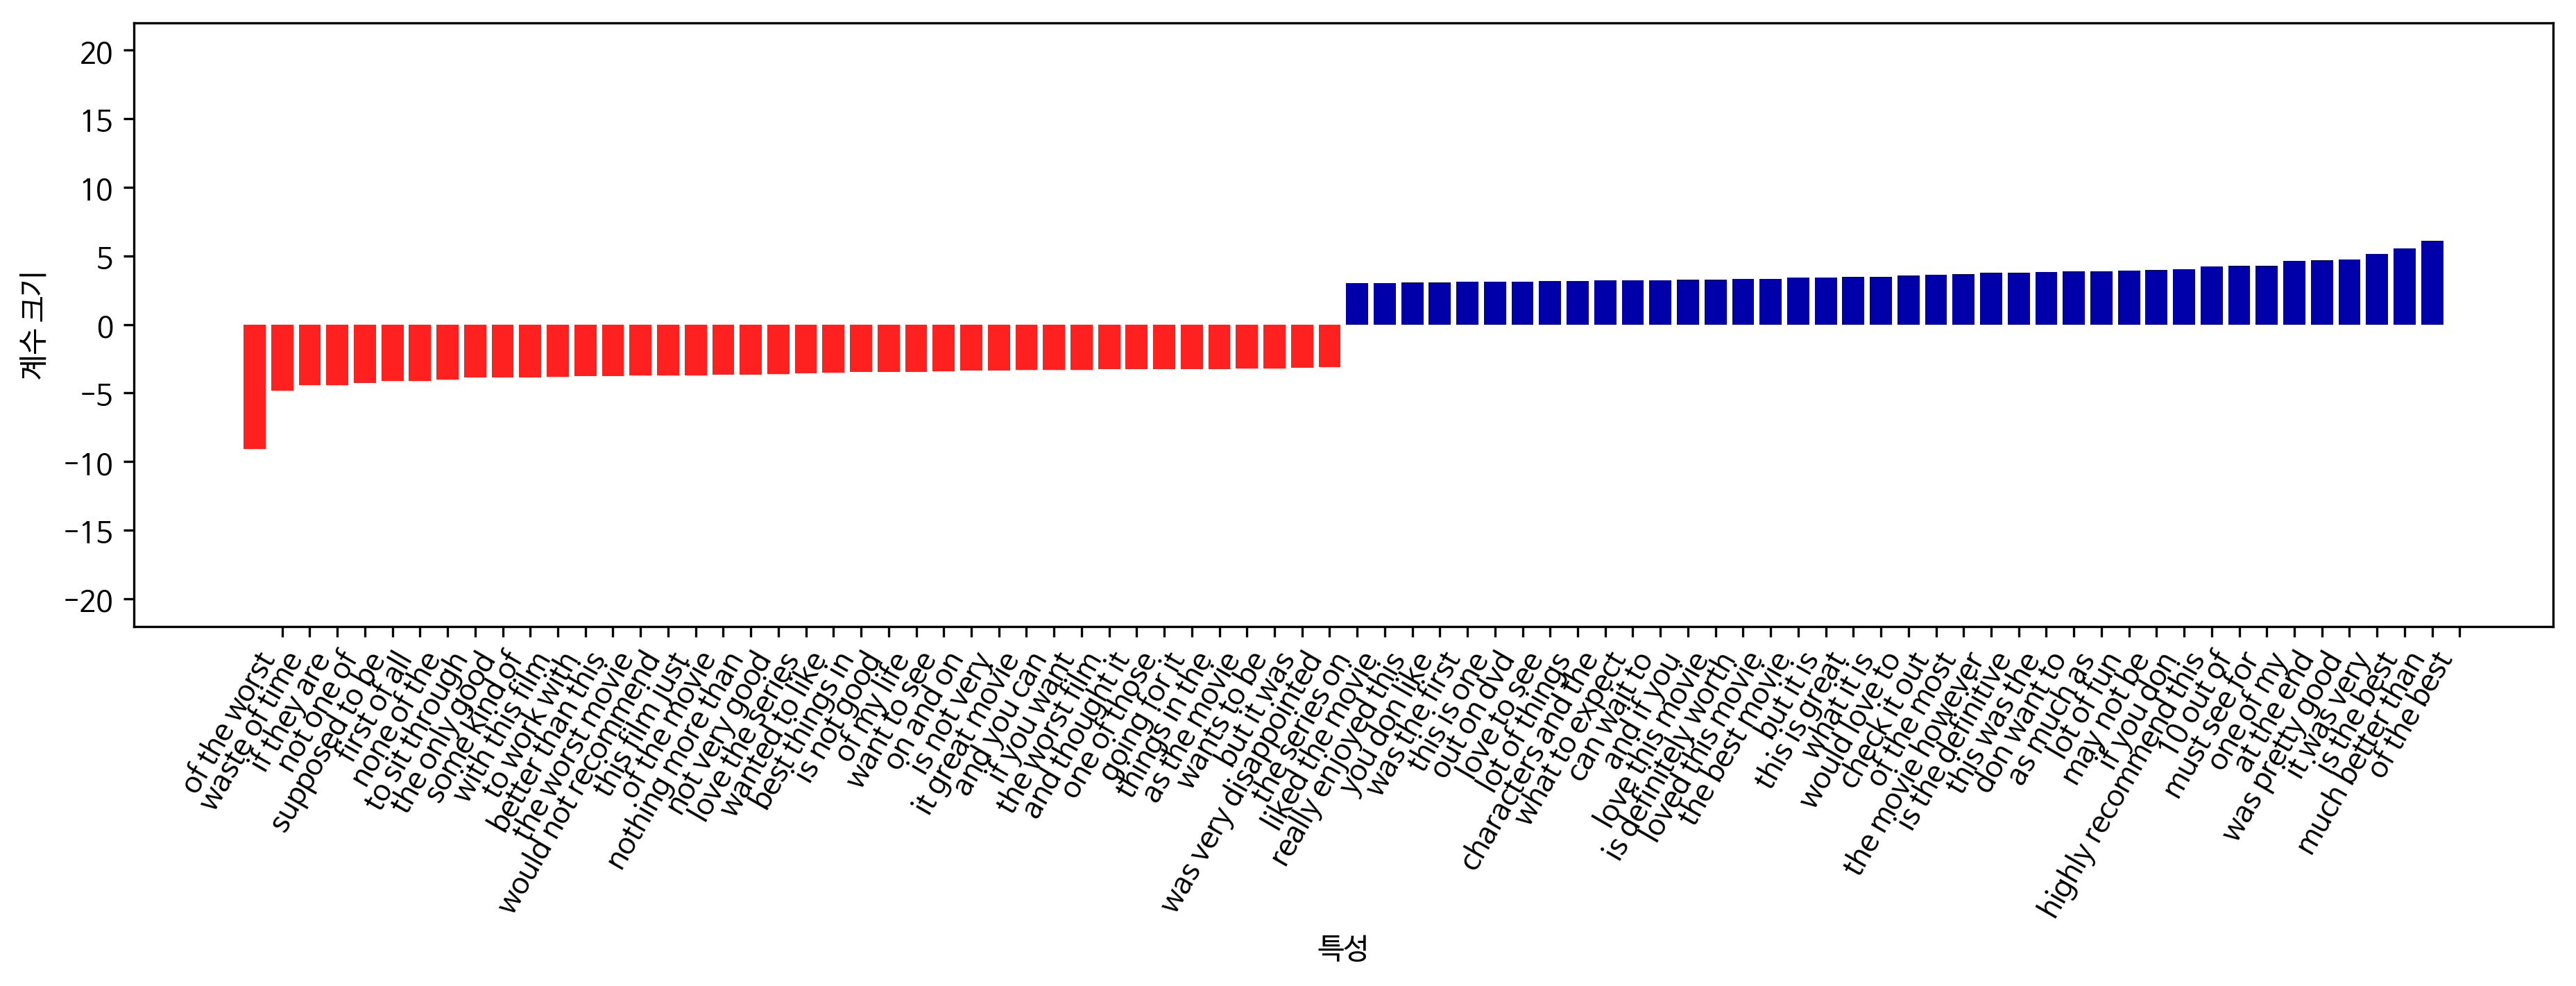

In [0]:
mglearn.tools.visualize_coefficients(coef.ravel()[mask],
                                     feature_names[mask], n_top_features=40)
plt.ylim(-22, 22)
#유니그램의 중요도와 비교하였을때 상당히 제한적임을 알 수 있음. 

### 고급 토큰화, 어간 추출, 표제어 추출
- 단어의 단수와 복수가 섞여 있다 
- drawback, drawbacks, replace, replaced, replacement, replaces, replacing 등을 하나로 합쳐야 제대로된 단어분석이 될 것이다
- 각 단어를 그 단어의 어간(Stem)으로 표현해서 같은 어간을 가진 모든 단어를 합치는 방법 사용
- 일일이 어미를 찾아 제외하는 규칙기반방식을 어간추출(stemming)이라고 한다
- 반면에 미리 만들어둔 형태사전을 사용하고, 문장에서 단어의 역할을 고려하는 처리방식을 형태소분석(lemmatization)이라고 부른다.
- 단어의 표준 형태를 표제어라고 하며, 표제어 추출과 어간 추출 두가지 작업을 함께 정규화(normalization)이라고 한다.
- 넓은 의미로 정규화에는 맞춤법 교정도 포함된다.
- nltk 패키지의 포터(Porter) 어간 추출기와 spacy 패키지를 사용하겠다. (영어 독일어 등 외국어만 지원)
- 한글의 어간과 형태소분석을 할 수 있는 오픈소스는 KoNLPy(http://konlpy.org/ko/)

In [0]:
# !pip install spacy
# !python -m spacy download en

#Spacy에 구현된 표제어 추출방식비교
import spacy
import nltk

In [0]:
# spacy의 영어 모델을 로드
en_nlp = spacy.load('en')
# nltk의 PorterStemmer 객체를 만듭니다
stemmer = nltk.stem.PorterStemmer()

# spacy의 표제어 추출과 nltk의 어간 추출을 비교하는 함수입니다
def compare_normalization(doc):
    # spacy로 문서를 토큰화합니다
    doc_spacy = en_nlp(doc)
    # spacy로 찾은 표제어를 출력합니다
    print("표제어(lemma):")
    print([token.lemma_ for token in doc_spacy])
    # PorterStemmer로 찾은 토큰을 출력합니다
    print("어간(norm):")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

compare_normalization(u"Our meeting today was worse than yesterday, "
                       "I'm scared of meeting the clients tomorrow.")

표제어:
['-PRON-', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', '-PRON-', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
어간:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


- 어간추출이 항상 단어에서 어간만 남겨놓고 제거하므로,"was"는 "wa"가 되지만 표제어추출(형태소분석)은 올바른 동사형은 "be를 추출함. 어간추출이 meeting을 meet으로 바꿈.
- 표제어 추출은 meeting을 명사로 인식함
- 일반적으로 표제어추출은 어간 추출보다 훨씬 복잡한 처리가 필요하나 머신러닝을 위해 토큰 정규화를 할때는 어간추출보다 좋은 결과를 냄. 